In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [46]:
import numpy as np

In [15]:
def load_tensorboard_scalars(file_path,key,max_epochs=350):

    event_acc = EventAccumulator(file_path)
    event_acc.Reload()

    if key not in event_acc.Tags()['scalars']:
        raise ValueError(f"key {key} not found in file path {file_path}")

    scalars = event_acc.Scalars(key)

    epochs = []
    values = []

    for scalar in scalars:
        if scalar.step > max_epochs:
            break
        epochs.append(scalar.step)
        values.append(scalar.value)

    return epochs,values

In [68]:
def plot_single_key(files,key,title = None,max_epochs=350):

    if (title == None):
        title = f'Plot for key:{key}'
        
    plt.figure()

    for file_path in files:

        epochs,values = load_tensorboard_scalars(file_path,key,max_epochs)
        label = file_path.split('/')[2]
        plt.plot(epochs,values,label = label)

    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [73]:
def plot_multiple_keys(file_path,keys,title = None,max_epochs=350):

    if title==None:
        title = f"Plot for {', '.join(keys)}"

    for key in keys:

        epochs,values = load_tensorboard_scalars(file_path,key,max_epochs)
        label = key.replace('Dice Score Class ','')
        plt.plot(epochs,values,label = label)

    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize='small')
    #plt.tight_layout()
    plt.grid(True)
    plt.show()

In [95]:
file_paths = [
    './out/swinunetr_base/events.out.tfevents.1725053348.c1101a-s29.ufhpc.3329011.0',
    './out/train_val_film_bs4/events.out.tfevents.1724872701.c1100a-s17.ufhpc.2671886.0',
    './out/train_deep_film_bs4/events.out.tfevents.1725383056.c0901a-s23.ufhpc.707793.0'
            ]

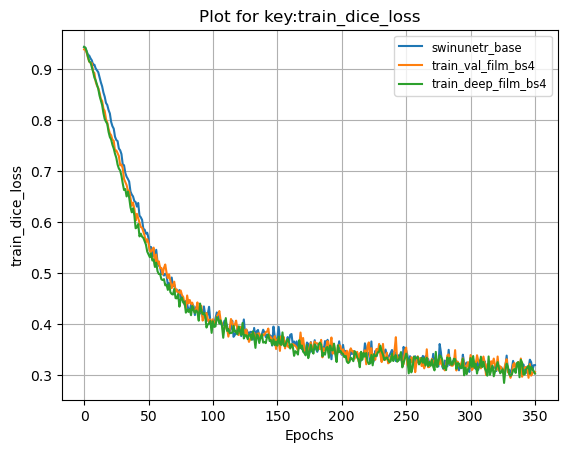

In [96]:
plot_single_key(file_paths,'train_dice_loss',max_epochs = 350)

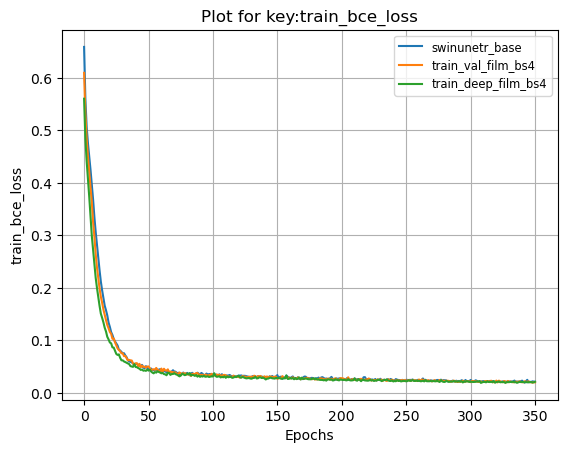

In [97]:
plot_single_key(file_paths,'train_bce_loss',max_epochs = 350)

In [98]:
ORGAN_NAME = ['Spleen','Liver','Pancreas','Hepatic Vessel','Liver Tumor','Pancreas Tumor','Hepatic Vessel Tumor','Lung Tumor','Colon Tumor']

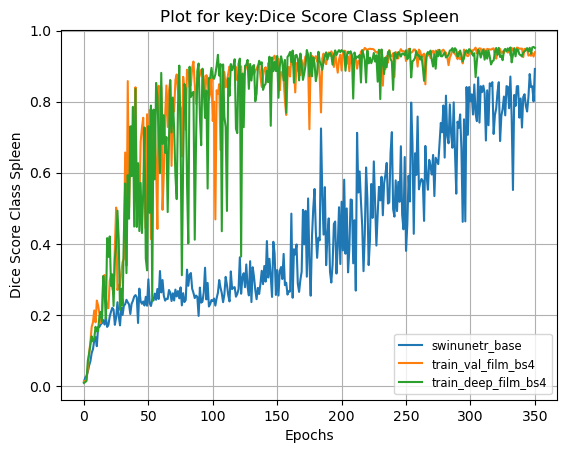

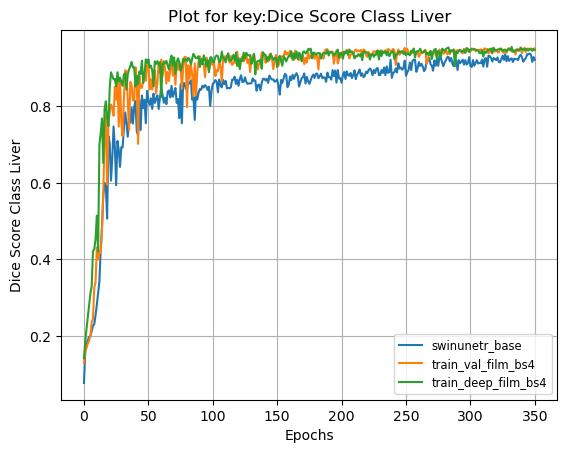

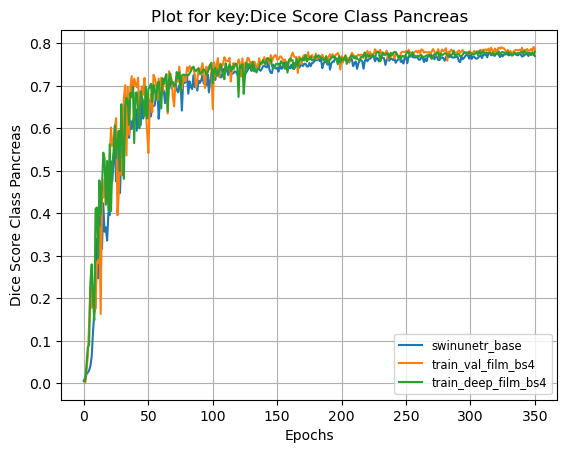

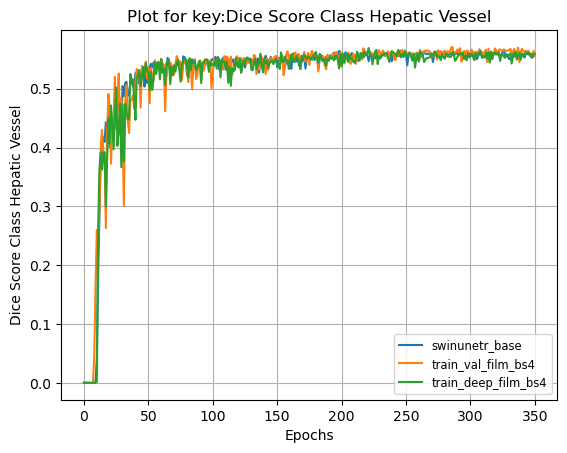

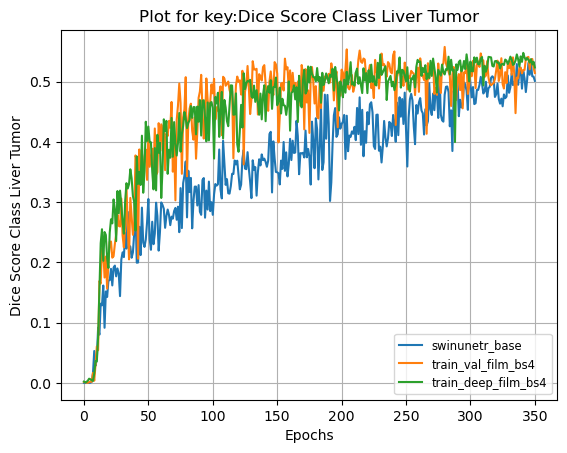

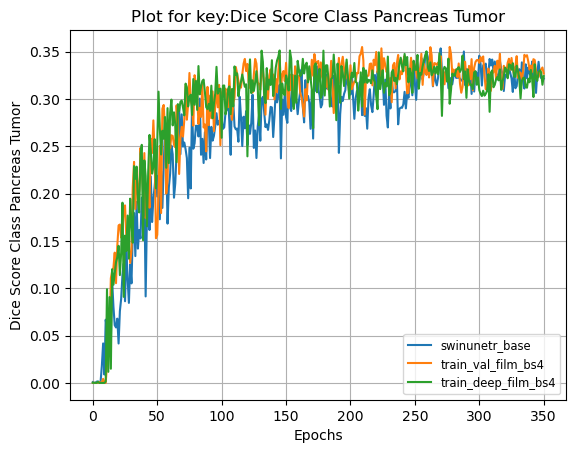

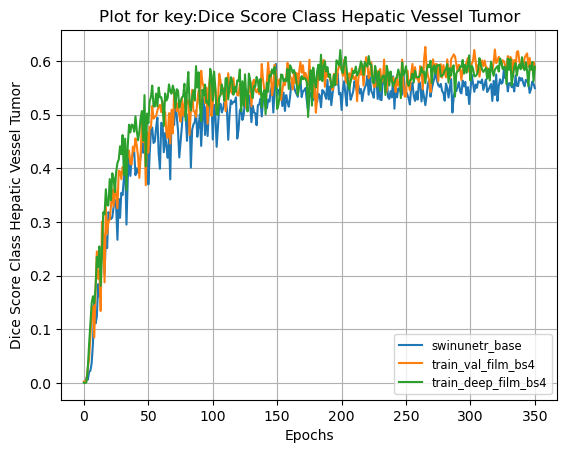

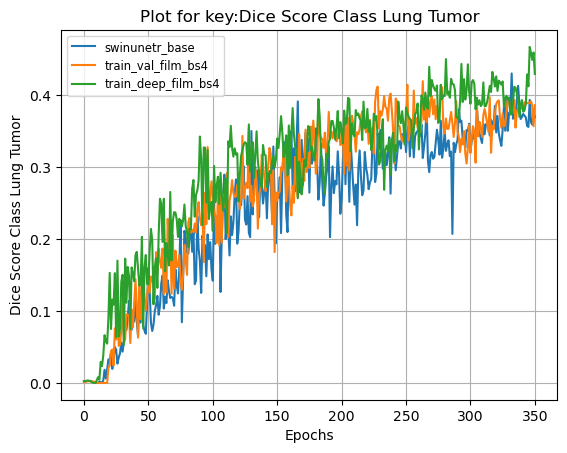

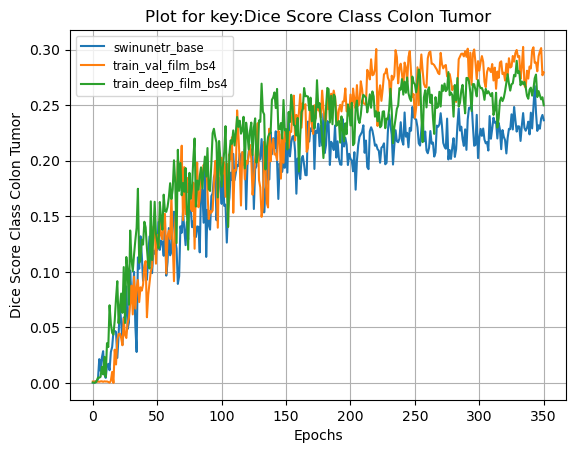

In [99]:
for organ in ORGAN_NAME:
    key = f"Dice Score Class {organ}"
    plot_single_key(file_paths,key,max_epochs = 350)

In [48]:
def find_best_avg_dice_epoch(file_path,max_epochs=350):

    all_values = []
    for organ in ORGAN_NAME:
        key = f"Dice Score Class {organ}"
        epochs,values = load_tensorboard_scalars(file_path,key,max_epochs)
        all_values.append(values)

    avg_values = np.mean(all_values,axis=0)
    best_avg_index = np.argmax(avg_values)
    best_epoch = epochs[best_avg_index]
    best_avg_value = avg_values[best_avg_index]
    return best_avg_index,best_epoch,best_avg_value
        

In [100]:
find_best_avg_dice_epoch(file_paths[0],max_epochs=375)

(346, 346, 0.5742210083537631)

In [101]:
find_best_avg_dice_epoch(file_paths[1],max_epochs=375)

(329, 329, 0.6022514833344353)

In [102]:
find_best_avg_dice_epoch(file_paths[2])

(346, 346, 0.6018993126021491)

In [103]:
file_path_universal = './out/train_val_clip_1/events.out.tfevents.1724946593.c0903a-s23.ufhpc.1540631.0'

In [104]:
find_best_avg_dice_epoch(file_path_universal,max_epochs=375)

(101, 101, 0.4884519684645865)

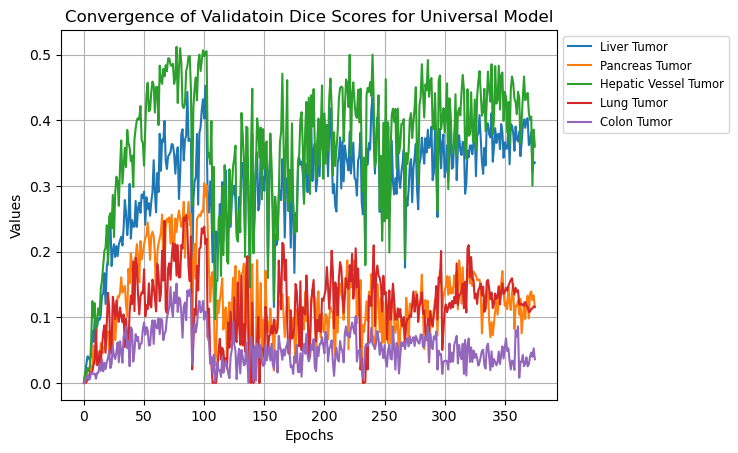

In [105]:
keys = []
for organ in ORGAN_NAME:
    key = f"Dice Score Class {organ}"
    keys.append(key)
#keys.append('train_dice_loss')
keys=keys[4:]
plot_multiple_keys(file_path_universal,keys,title = 'Convergence of Validatoin Dice Scores for Universal Model',max_epochs=375)

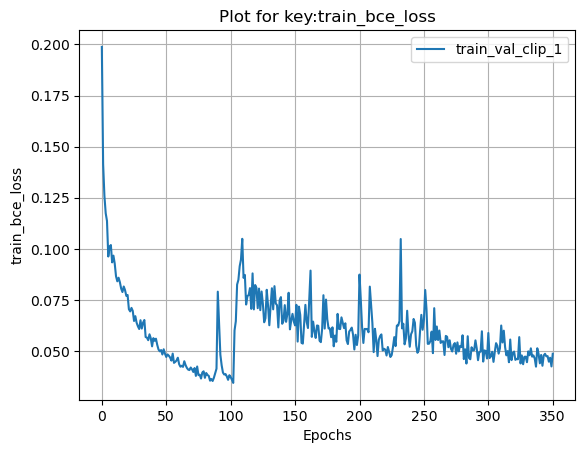

In [63]:
plot_single_key([file_path_universal],'train_bce_loss')